In [1]:
#Importing the libraries to help with the analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Crime Data Analysis From Year(2020-2023)

In [2]:
# Loading the data
df = pd.read_csv("Crime_Data_from_2020_to_Present.csv")

In [3]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [4]:
df.info

<bound method DataFrame.info of             DR_NO               Date Rptd                DATE OCC  TIME OCC  \
0        10304468  01/08/2020 12:00:00 AM  01/08/2020 12:00:00 AM      2230   
1       190101086  01/02/2020 12:00:00 AM  01/01/2020 12:00:00 AM       330   
2       200110444  04/14/2020 12:00:00 AM  02/13/2020 12:00:00 AM      1200   
3       191501505  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM      1730   
4       191921269  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM       415   
...           ...                     ...                     ...       ...   
829773  231604807  01/27/2023 12:00:00 AM  01/26/2023 12:00:00 AM      1800   
829774  231606525  03/22/2023 12:00:00 AM  03/22/2023 12:00:00 AM      1000   
829775  231210064  04/12/2023 12:00:00 AM  04/12/2023 12:00:00 AM      1630   
829776  230115220  07/02/2023 12:00:00 AM  07/01/2023 12:00:00 AM         1   
829777  230906458  03/05/2023 12:00:00 AM  03/05/2023 12:00:00 AM       900   

        AREA    ARE

# Data Cleaning

In [5]:
# 1. Handling Missing Values
missing_values = df.isnull().sum()

In [6]:

# 2. Data Type Conversion
# Checking the current data types
data_types = df.dtypes

In [7]:
# 3. Removing Duplicates
duplicates = df.duplicated().sum()

In [8]:
missing_values, data_types, duplicates

(DR_NO                  0
 Date Rptd              0
 DATE OCC               0
 TIME OCC               0
 AREA                   0
 AREA NAME              0
 Rpt Dist No            0
 Part 1-2               0
 Crm Cd                 0
 Crm Cd Desc            0
 Mocodes           114856
 Vict Age               0
 Vict Sex          109299
 Vict Descent      109307
 Premis Cd             10
 Premis Desc          492
 Weapon Used Cd    540459
 Weapon Desc       540459
 Status                 0
 Status Desc            0
 Crm Cd 1              10
 Crm Cd 2          768750
 Crm Cd 3          827720
 Crm Cd 4          829717
 LOCATION               0
 Cross Street      697270
 LAT                    0
 LON                    0
 dtype: int64,
 DR_NO               int64
 Date Rptd          object
 DATE OCC           object
 TIME OCC            int64
 AREA                int64
 AREA NAME          object
 Rpt Dist No         int64
 Part 1-2            int64
 Crm Cd              int64
 Crm Cd Desc  

# Missing Values
1. Several columns have a significant number of missing values, such as 'Mocodes', 'Vict Sex', 'Vict Descent', 'Weapon Used Cd', 'Weapon Desc', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', and 'Cross Street'.

2. A few columns like 'Premis Cd', 'Premis Desc', and 'Crm Cd 1' have a small number of missing values.

# Data Types
The 'Date Rptd' and 'DATE OCC' columns are in object format and should be converted to datetime.

# Duplicates
No duplicate rows were found in the dataset.

In [9]:
# Data Cleaning: Converting date columns to datetime format

# Converting 'Date Rptd' and 'DATE OCC' to datetime with specified format
# Converting 'Date Rptd' and 'DATE OCC' to datetime with specified format
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'], format='%m/%d/%Y %I:%M:%S %p')
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], format='%m/%d/%Y %I:%M:%S %p')

In [10]:
# Rechecking the data types after conversion
updated_data_types = df[['Date Rptd', 'DATE OCC']].dtypes

In [11]:
updated_data_types

Date Rptd    datetime64[ns]
DATE OCC     datetime64[ns]
dtype: object

In [12]:
# Handling Missing Values:

# For columns with a small number of missing values, we can consider imputation.


# Imputing missing values for columns with few missing entries
df['Premis Cd'] = df['Premis Cd'].fillna(df['Premis Cd'].mode()[0])
df['Crm Cd 1'] = df['Crm Cd 1'].fillna(df['Crm Cd 1'].mode()[0])
df['Premis Desc'] = df['Premis Desc'].fillna("Unknown")

In [13]:
# Checking the updated dataset for missing values in these columns
updated_missing_values = df[['Premis Cd', 'Crm Cd 1', 'Premis Desc']].isnull().sum()

In [14]:
updated_data_types, updated_missing_values

(Date Rptd    datetime64[ns]
 DATE OCC     datetime64[ns]
 dtype: object,
 Premis Cd      0
 Crm Cd 1       0
 Premis Desc    0
 dtype: int64)

In [15]:
# Dropping columns with a large number of missing values
# Given the large number of missing values in some columns, we need to decide on a strategy.
# For columns with a large number of missing values, we need to assess their importance.

# Columns identified with many missing values
columns_to_drop = ['Mocodes', 'Vict Sex', 'Vict Descent', 'Weapon Used Cd', 
                   'Weapon Desc', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Cross Street']

In [16]:
# Dropping these columns
crime_data_cleaned = df.drop(columns=columns_to_drop)

In [17]:
# Summary Statistics for numerical columns
numerical_summary = crime_data_cleaned.describe()

In [18]:
numerical_summary

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Crm Cd 1,LAT,LON
count,8.297780e+05,829778,829778,829778.000000,829778.000000,829778.000000,829778.000000,829778.000000,829778.000000,829778.000000,829778.000000,829778.000000,829778.000000
mean,2.162952e+08,2021-12-31 18:27:09.283976960,2021-12-21 05:07:56.012619776,1335.875361,10.709583,1117.382313,1.413584,500.832378,29.786172,305.816690,500.571084,33.980561,-118.031228
min,8.170000e+02,2020-01-01 00:00:00,2020-01-01 00:00:00,1.000000,1.000000,101.000000,1.000000,110.000000,-3.000000,101.000000,110.000000,0.000000,-118.667600
25%,2.102084e+08,2021-01-29 00:00:00,2021-01-15 00:00:00,900.000000,6.000000,621.000000,1.000000,331.000000,6.000000,101.000000,331.000000,34.013700,-118.429600
50%,2.201238e+08,2022-01-24 00:00:00,2022-01-10 00:00:00,1415.000000,11.000000,1142.000000,1.000000,442.000000,31.000000,203.000000,442.000000,34.058400,-118.321500
75%,2.220150e+08,2022-12-09 00:00:00,2022-11-29 00:00:00,1900.000000,16.000000,1615.000000,2.000000,626.000000,45.000000,501.000000,626.000000,34.163000,-118.273900
max,2.399165e+08,2023-10-30 00:00:00,2023-10-30 00:00:00,2359.000000,21.000000,2199.000000,2.000000,956.000000,120.000000,976.000000,956.000000,34.334300,0.000000
std,1.088333e+07,NaN,NaN,653.951088,6.093710,609.362993,0.492476,207.793088,21.782421,216.773441,207.579795,1.780449,6.173243


In [19]:
# Checking the dataset after dropping columns
remaining_columns = crime_data_cleaned.columns
remaining_columns, crime_data_cleaned.shape

(Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
        'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Vict Age',
        'Premis Cd', 'Premis Desc', 'Status', 'Status Desc', 'Crm Cd 1',
        'LOCATION', 'LAT', 'LON'],
       dtype='object'),
 (829778, 19))

In [20]:
# Identifying and Removing Outliers using the Interquartile Range (IQR) method

def remove_outliers(df, column):
    """
    Remove outliers from a dataframe by column using the IQR method.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [21]:
# List of numerical columns to check for outliers
numerical_columns = ['TIME OCC', 'AREA', 'Rpt Dist No', 'Part 1-2', 'Crm Cd', 
                     'Vict Age', 'Premis Cd', 'Crm Cd 1', 'LAT', 'LON']

In [22]:
# Applying outlier removal for each numerical column
for col in numerical_columns:
    crime_data_cleaned = remove_outliers(crime_data_cleaned, col)

In [23]:
# Checking the shape of the dataset after outlier removal
cleaned_data_shape = crime_data_cleaned.shape
cleaned_data_shape

(803040, 19)

# Exploratory Data Analysis (EDA)

EDA: Summary Statistics(numerical and categorical summary)

In [24]:
# EDA: Summary Statistics

# Calculating summary statistics for numerical columns
numerical_summary = crime_data_cleaned.describe()

In [25]:
# Summary for categorical columns
categorical_columns = ['AREA NAME', 'Crm Cd Desc', 'Premis Desc', 'Status Desc']
categorical_summary = crime_data_cleaned[categorical_columns].describe()

In [26]:
numerical_summary, categorical_summary

(              DR_NO                      Date Rptd  \
 count  8.030400e+05                         803040   
 mean   2.163494e+08  2022-01-02 01:35:58.493723648   
 min    8.170000e+02            2020-01-01 00:00:00   
 25%    2.102088e+08            2021-01-30 00:00:00   
 50%    2.201254e+08            2022-01-27 00:00:00   
 75%    2.220166e+08            2022-12-10 00:00:00   
 max    2.399165e+08            2023-10-30 00:00:00   
 std    1.088314e+07                            NaN   
 
                             DATE OCC       TIME OCC           AREA  \
 count                         803040  803040.000000  803040.000000   
 mean   2021-12-22 10:40:58.350268672    1335.743933      10.884181   
 min              2020-01-01 00:00:00       1.000000       1.000000   
 25%              2021-01-16 00:00:00     900.000000       6.000000   
 50%              2022-01-13 00:00:00    1415.000000      11.000000   
 75%              2022-11-30 00:00:00    1900.000000      16.000000   
 max  

#summary Statistics - Explanation

1. Numerical Columns:

DR_NO: Report numbers range from approximately 817 to 2399165, indicating a wide range of reports.

TIME OCC: The times of occurrences are spread throughout the day, with a mean time around 13:35.

AREA: Covers 21 areas, evenly distributed.

Rpt Dist No, Part 1-2, Crm Cd, Vict Age, Premis Cd, Crm Cd 1: These show a variety of distributions, indicating diverse types of crimes, victim ages, and premises involved.

LAT and LON: The latitude and longitude values are clustered around certain areas, as expected for a city-specific dataset.

2. Categorical Columns:

AREA NAME: 21 unique area names, with 'Central' being the most frequent.

Crm Cd Desc: 138 unique crime descriptions, with 'VEHICLE - STOLEN' being the most common.

Premis Desc: 307 unique premises descriptions, with 'STREET' being the most common.

Status Desc: 6 unique status descriptions, with 'Invest Cont' (Investigation Continuing) being the most frequent.

# Visualizing the Distribution of Variables

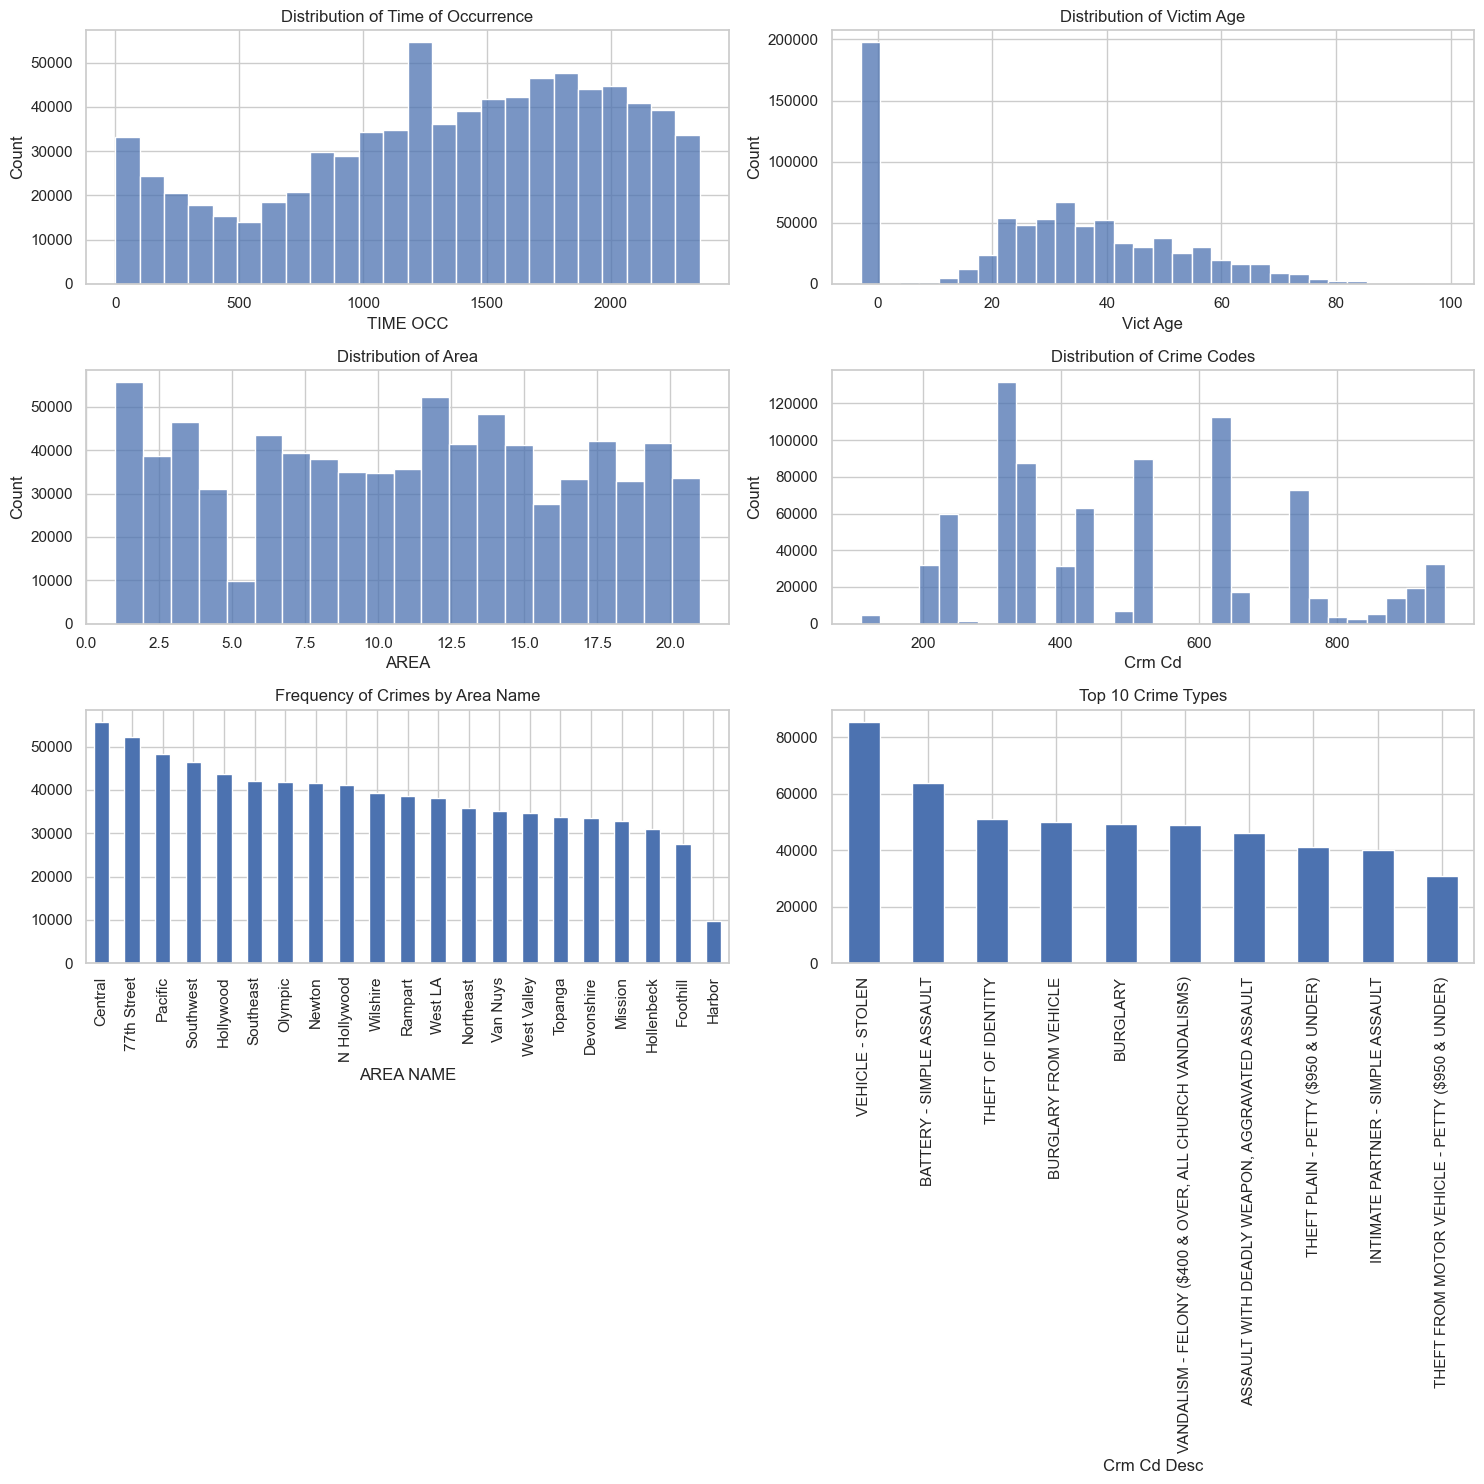

In [27]:
# Setting up the visualization environment
sns.set(style="whitegrid")

# Creating visualizations
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Histograms for numerical variables
sns.histplot(crime_data_cleaned['TIME OCC'], bins=24, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Time of Occurrence')

sns.histplot(crime_data_cleaned['Vict Age'], bins=30, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Victim Age')

sns.histplot(crime_data_cleaned['AREA'], bins=21, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Area')

sns.histplot(crime_data_cleaned['Crm Cd'], bins=30, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Crime Codes')

# Bar charts for key categorical variables
crime_data_cleaned['AREA NAME'].value_counts().plot(kind='bar', ax=axes[2, 0])
axes[2, 0].set_title('Frequency of Crimes by Area Name')

crime_data_cleaned['Crm Cd Desc'].value_counts().head(10).plot(kind='bar', ax=axes[2, 1])
axes[2, 1].set_title('Top 10 Crime Types')

plt.tight_layout()
plt.show()

#Visualizing the Distribution of Variables - Explanation


Distribution of Time of Occurrence: The histogram shows that crime occurrences are spread throughout the day, with peaks during late evening hours.

Distribution of Victim Age: The age of victims varies widely, with a noticeable concentration in the younger age groups.

Distribution of Area: The histogram displays an even distribution of crimes across different areas, suggesting no single area is predominantly affected.

Distribution of Crime Codes: Indicates a range of different types of crimes, with some codes being more frequent than others.

Frequency of Crimes by Area Name: 'Central' area reports the highest number of crimes, followed by other areas.

Top 10 Crime Types: 'VEHICLE - STOLEN' appears to be the most common crime type, followed by other types like assault and burglary.

# Temporal Trends Analysis

In [28]:
# Temporal Trends Analysis

# Extracting year, month, and day of the week from the 'DATE OCC' column
crime_data_cleaned['Year'] = crime_data_cleaned['DATE OCC'].dt.year
crime_data_cleaned['Month'] = crime_data_cleaned['DATE OCC'].dt.month_name()
crime_data_cleaned['DayOfWeek'] = crime_data_cleaned['DATE OCC'].dt.day_name()

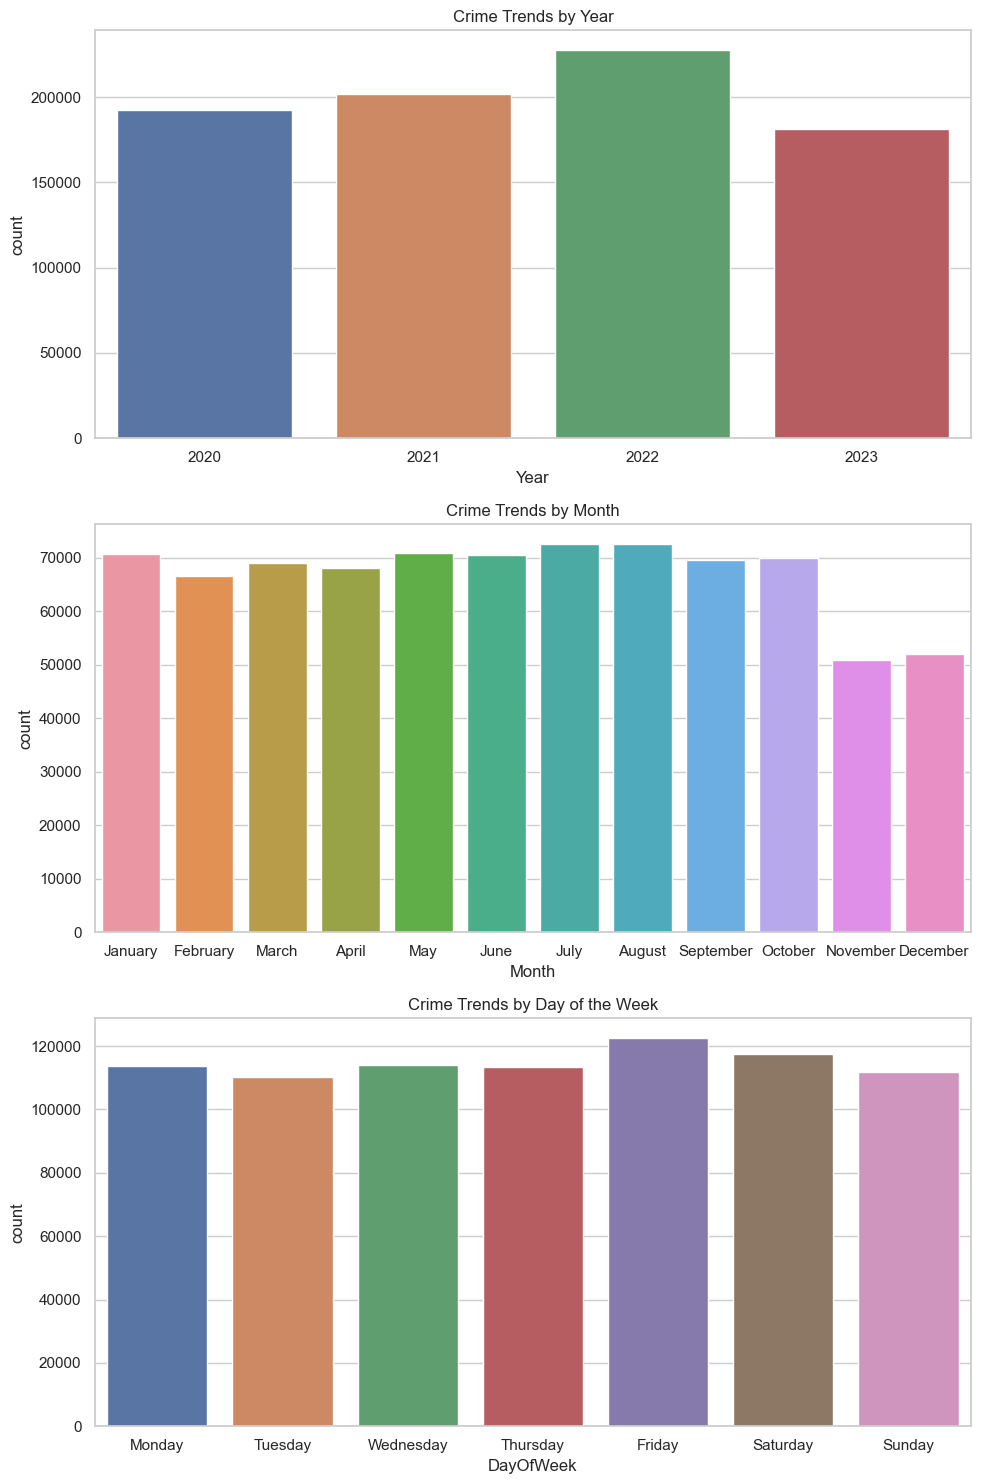

In [29]:
# Setting up visualization environment
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Yearly Trend
sns.countplot(x='Year', data=crime_data_cleaned, ax=axes[0])
axes[0].set_title('Crime Trends by Year')

# Monthly Trend
sns.countplot(x='Month', data=crime_data_cleaned, ax=axes[1], order=['January', 'February', 'March', 'April', 'May', 'June', 
                                                                      'July', 'August', 'September', 'October', 'November', 'December'])
axes[1].set_title('Crime Trends by Month')

# Day of the Week Trend
sns.countplot(x='DayOfWeek', data=crime_data_cleaned, ax=axes[2], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 
                                                                         'Saturday', 'Sunday'])
axes[2].set_title('Crime Trends by Day of the Week')

plt.tight_layout()
plt.show()

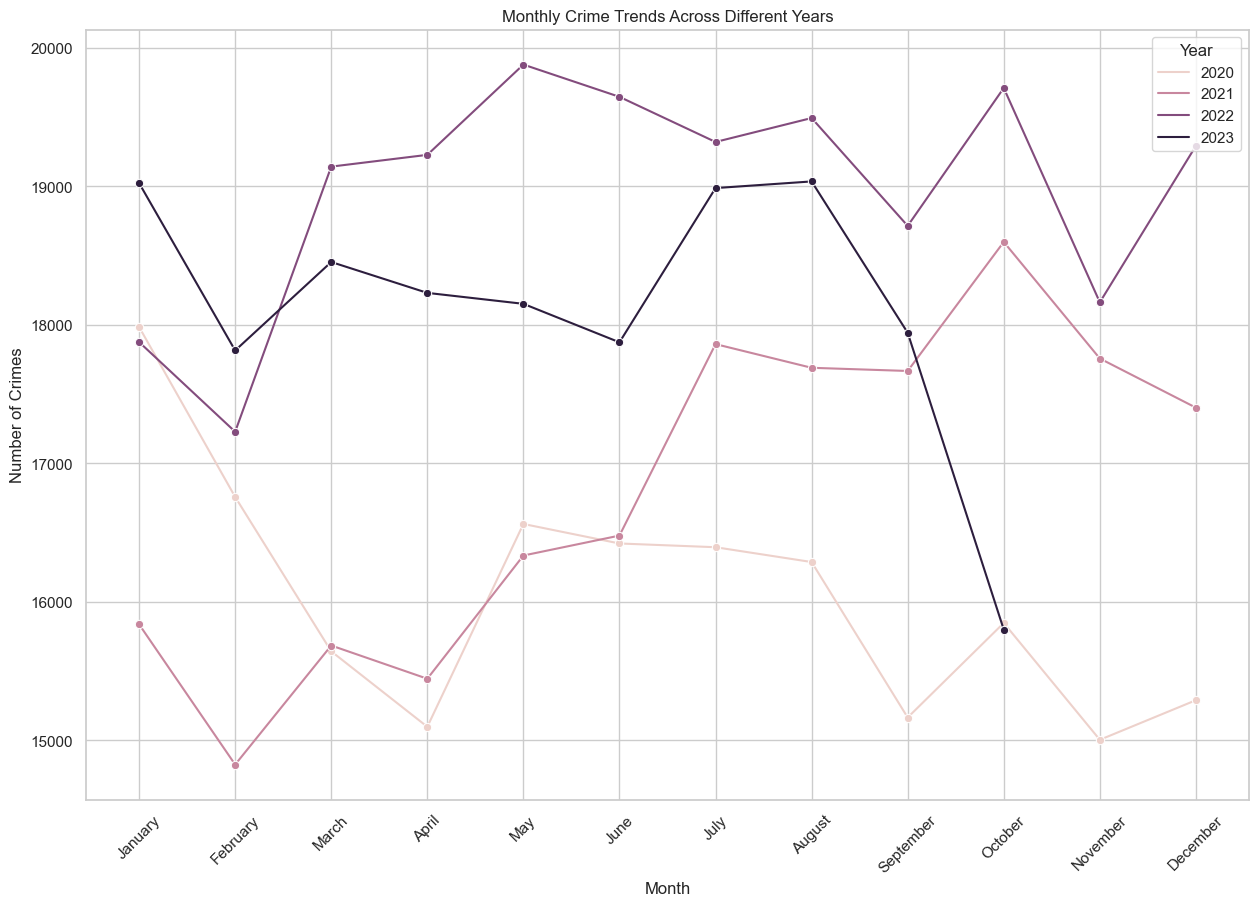

In [30]:
# Visualizing crime trends for every month for the seperate years

# Assuming crime_data_cleaned['DATE OCC'] is already in datetime format
crime_data_cleaned['Year'] = crime_data_cleaned['DATE OCC'].dt.year
crime_data_cleaned['Month'] = crime_data_cleaned['DATE OCC'].dt.month_name()
crime_data_cleaned['DayOfWeek'] = crime_data_cleaned['DATE OCC'].dt.day_name()

# Converting 'Month' to a categorical type with ordered categories
months_in_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                   'July', 'August', 'September', 'October', 'November', 'December']
crime_data_cleaned['Month'] = pd.Categorical(crime_data_cleaned['Month'], categories=months_in_order, ordered=True)

# Visualizing the monthly trend for each year separately
plt.figure(figsize=(15, 10))

# Creating a lineplot for monthly trends across different years
sns.lineplot(x='Month', y='DR_NO', hue='Year', estimator=len, data=crime_data_cleaned, 
             errorbar=None, marker='o')

# Enhancing the plot
plt.title('Monthly Crime Trends Across Different Years')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.legend(title='Year', loc='upper right')
plt.grid(True)

plt.show()

# Correlation Analysis

Investigate correlations between numerical variables, such as time of occurrence and crime codes.


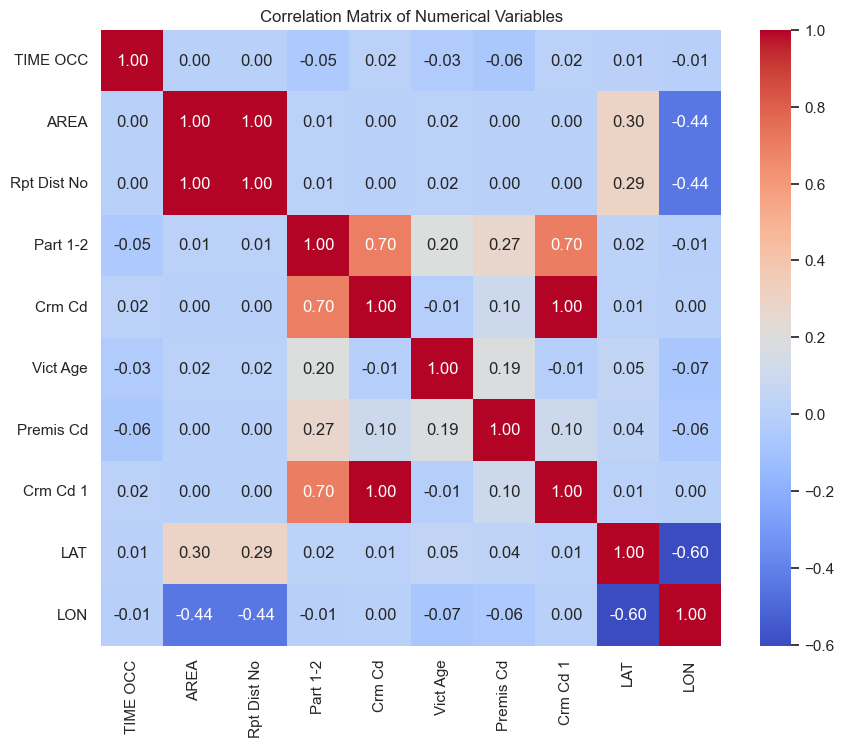

In [31]:
# Calculating the correlation matrix for numerical columns
numerical_columns_for_corr = ['TIME OCC', 'AREA', 'Rpt Dist No', 'Part 1-2', 'Crm Cd', 
                              'Vict Age', 'Premis Cd', 'Crm Cd 1', 'LAT', 'LON']
correlation_matrix = crime_data_cleaned[numerical_columns_for_corr].corr()

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

The correlation matrix visualized as a heatmap shows the relationships between the numerical variables in the crime dataset:

The correlation values range from -1 to 1, where values close to 1 or -1 indicate strong positive or negative correlations, respectively, and values around 0 indicate a lack of linear correlation.

From the heatmap, it appears that most variables have low to moderate correlations with each other.

# crime types analysis

In [32]:
# Extracting the top 5 crimes and performing crime types analysis

# Finding the top 5 most frequent crime types
top_5_crimes = crime_data_cleaned['Crm Cd Desc'].value_counts().head(5)

# Creating a table for the top 5 crimes
top_5_crimes_table = pd.DataFrame(top_5_crimes).reset_index()
top_5_crimes_table.columns = ['Crime Type', 'Frequency']

top_5_crimes_table


,Crime Type,Frequency
0,VEHICLE - STOLEN,85493
1,BATTERY - SIMPLE ASSAULT,63747
2,THEFT OF IDENTITY,51116
3,BURGLARY FROM VEHICLE,49886
4,BURGLARY,49236


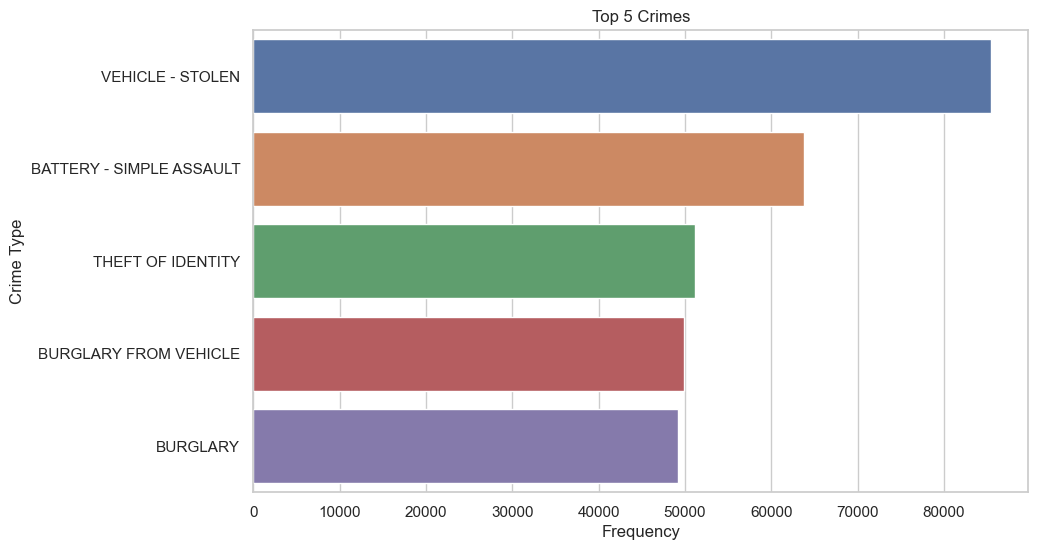

In [33]:
# Visualizing the top 5 crimes

# Creating a bar plot for the top 5 crimes
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_crimes_table['Frequency'], y=top_5_crimes_table['Crime Type'])

# Enhancing the plot
plt.title('Top 5 Crimes')
plt.xlabel('Frequency')
plt.ylabel('Crime Type')
plt.show()


The bar plot visually represents the top 5 crimes from your dataset:

VEHICLE - STOLEN stands out as the most frequent crime, with a significantly higher occurrence compared to the others.

BATTERY - SIMPLE ASSAULT and THEFT OF IDENTITY follow as the next most common crimes.

BURGLARY FROM VEHICLE and VANDALISM - FELONY also show substantial frequencies, though they are less frequent than the top three crimes.

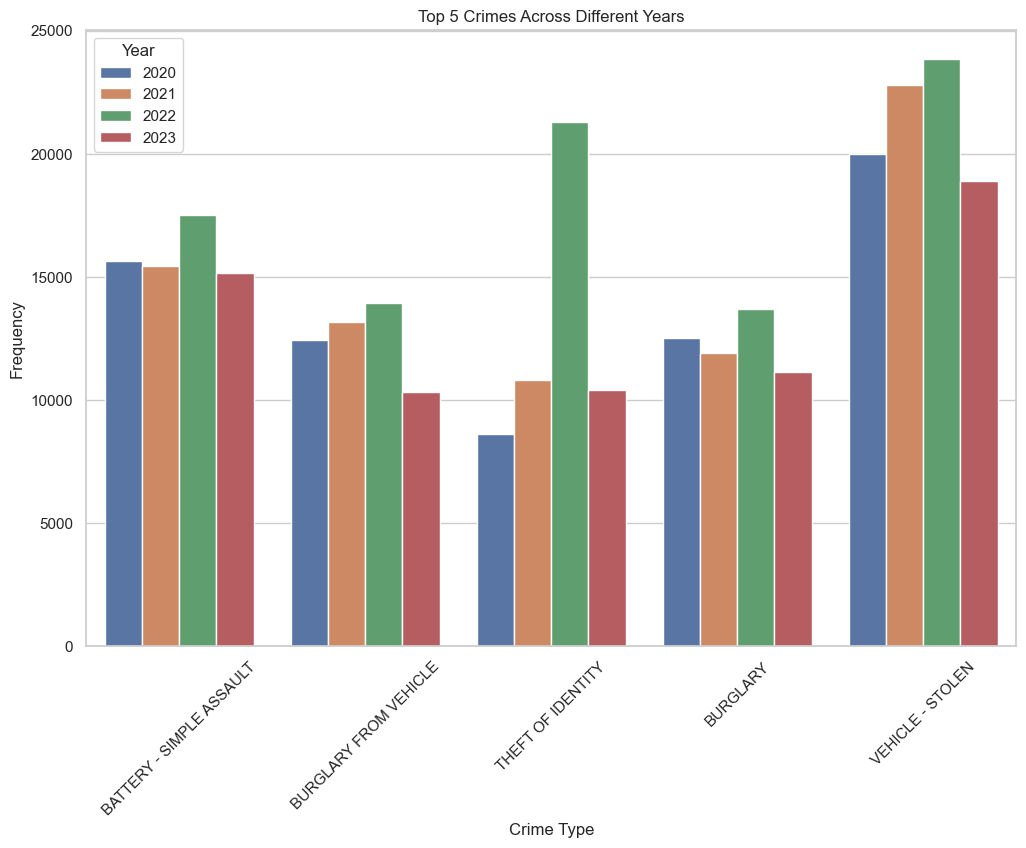

In [34]:
# Visualizing the top 5 crimes for each of the years

# Filtering the dataset for the top 5 crimes
top_5_crimes_list = top_5_crimes_table['Crime Type'].tolist()
top_5_crimes_yearly = crime_data_cleaned[crime_data_cleaned['Crm Cd Desc'].isin(top_5_crimes_list)]

# Creating a bar plot for the top 5 crimes across different years
plt.figure(figsize=(12, 8))
sns.countplot(x='Crm Cd Desc', hue='Year', data=top_5_crimes_yearly)

# Enhancing the plot
plt.title('Top 5 Crimes Across Different Years')
plt.xlabel('Crime Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.show()